In [6]:
import sys
sys.path.append('..')  # Ana dizini Python path'ine ekle

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from src.analysis.data_preprocessing import DataPreprocessor

In [7]:
# Görselleştirmeler için stil ayarları
plt.style.use('default')  # seaborn yerine default stil kullanalım
sns.set_theme()  # Seaborn temasını ayarla
plt.rcParams['figure.figsize'] = (12, 8)

In [9]:
# Veri ön işleme
preprocessor = DataPreprocessor('../data/data.csv')
first_sem, second_sem = preprocessor.prepare_data()

In [10]:
# 1. Temel Analiz
print("Dataset Boyutu:", preprocessor.data.shape)
print("\nOluşturulan Zamansal Özellikler:")
temporal_features = ['grade_change', 'approved_units_change', 
                    'evaluations_change', 'success_rate_change']
print(temporal_features)

Dataset Boyutu: (4424, 41)

Oluşturulan Zamansal Özellikler:
['grade_change', 'approved_units_change', 'evaluations_change', 'success_rate_change']


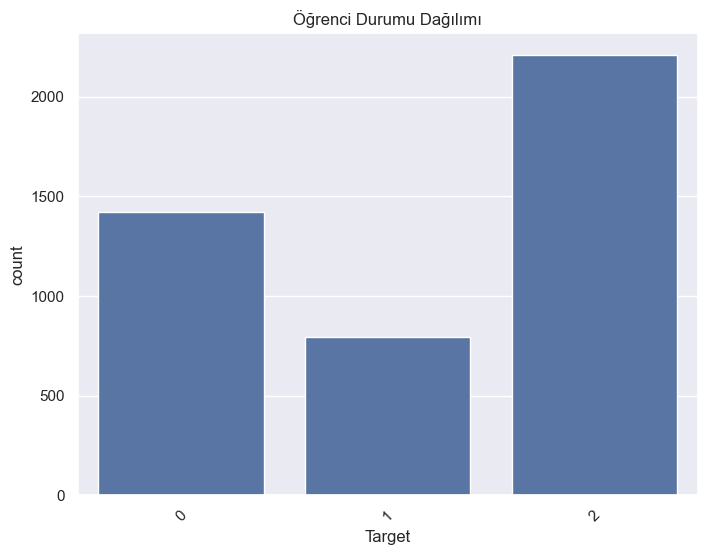

In [11]:
# 2. Hedef Değişken Analizi
plt.figure(figsize=(8, 6))
sns.countplot(data=preprocessor.data, x='Target')
plt.title('Öğrenci Durumu Dağılımı')
plt.xticks(rotation=45)
plt.show()

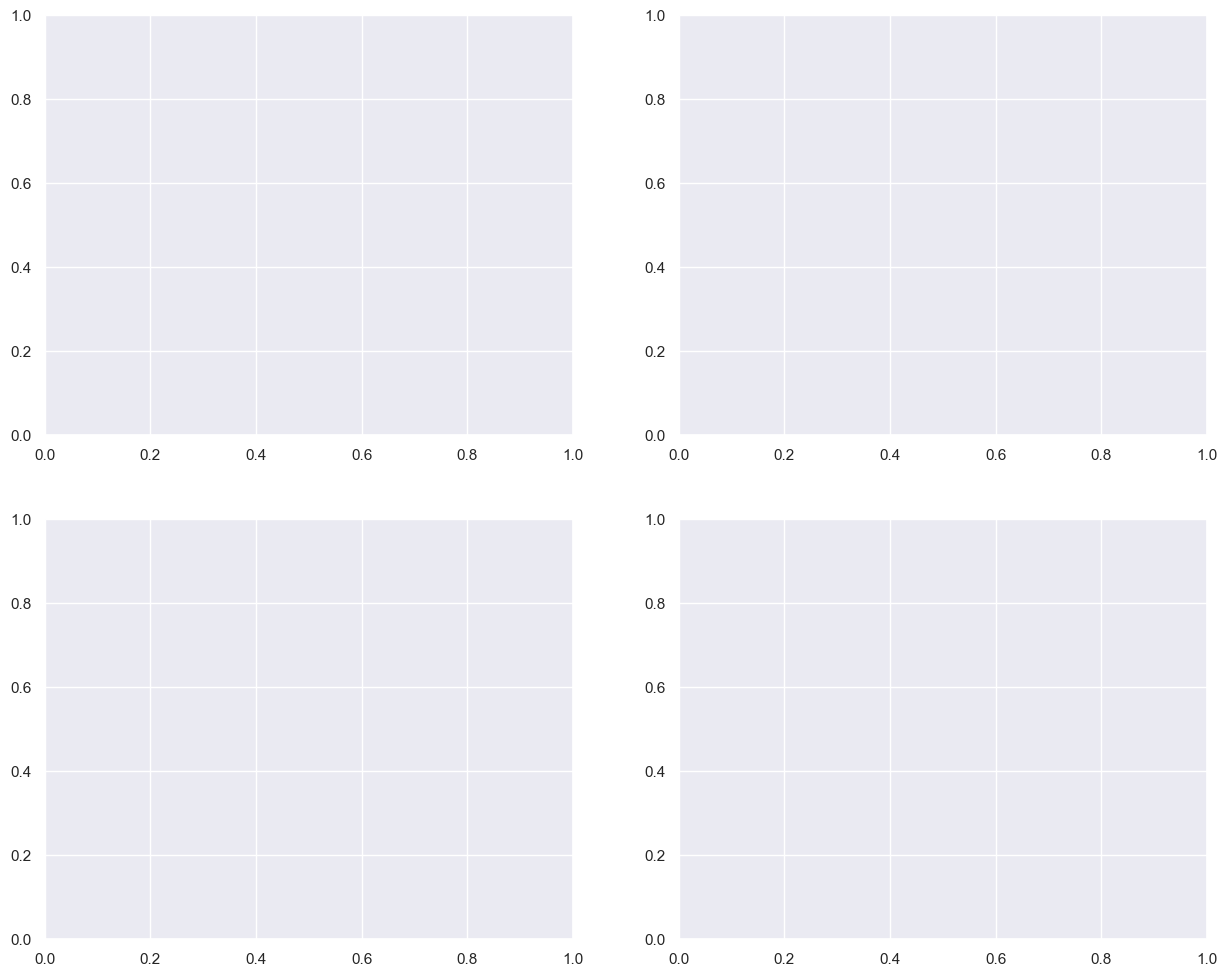

In [12]:
# 3. Zamansal Değişim Analizi
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

In [13]:
# 3.1 Not Değişimi
sns.boxplot(data=preprocessor.data, y='grade_change', ax=axes[0,0])
axes[0,0].set_title('Dönemler Arası Not Değişimi')

Text(0.5, 1.0, 'Dönemler Arası Not Değişimi')

In [14]:
# 3.2 Onaylanan Ders Değişimi
sns.boxplot(data=preprocessor.data, x='Target', y='approved_units_change', ax=axes[0,1])
axes[0,1].set_title('Hedef Değişkene Göre Onaylanan Ders Değişimi')
axes[0,1].tick_params(axis='x', rotation=45)

In [15]:
# 3.3 Başarı Oranı Değişimi
sns.histplot(data=preprocessor.data, x='success_rate_change', ax=axes[1,0])
axes[1,0].set_title('Başarı Oranı Değişimi Dağılımı')

Text(0.5, 1.0, 'Başarı Oranı Değişimi Dağılımı')

In [16]:
# 3.4 Değerlendirme Sayısı Değişimi
sns.boxplot(data=preprocessor.data, x='Target', y='evaluations_change', ax=axes[1,1])
axes[1,1].set_title('Hedef Değişkene Göre Değerlendirme Sayısı Değişimi')
axes[1,1].tick_params(axis='x', rotation=45)

In [17]:
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

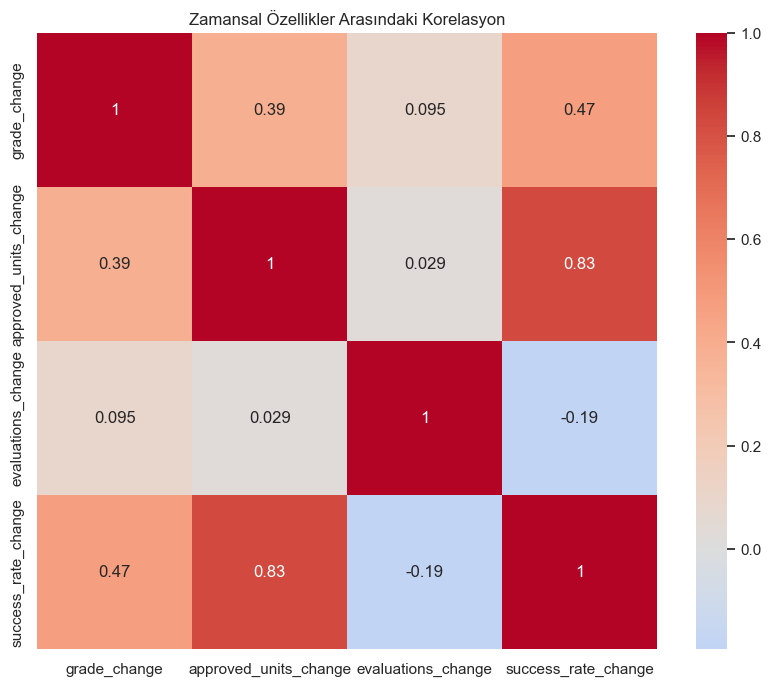

In [18]:
# 4. Korelasyon Analizi
plt.figure(figsize=(10, 8))
sns.heatmap(preprocessor.data[temporal_features].corr(), 
            annot=True, cmap='coolwarm', center=0)
plt.title('Zamansal Özellikler Arasındaki Korelasyon')
plt.show()

In [19]:
# 5. Özet İstatistikler
print("\nZamansal Özelliklerin Hedef Değişkene Göre Ortalamaları:")
print(preprocessor.data.groupby('Target')[temporal_features].mean().round(2))


Zamansal Özelliklerin Hedef Değişkene Göre Ortalamaları:
        grade_change  approved_units_change  evaluations_change  \
Target                                                            
0              -1.36                  -0.61               -0.58   
1              -0.01                  -0.26                0.09   
2               0.05                  -0.06               -0.13   

        success_rate_change  
Target                       
0                     -0.10  
1                     -0.04  
2                     -0.00  
